In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import torch
import tensorflow as tf

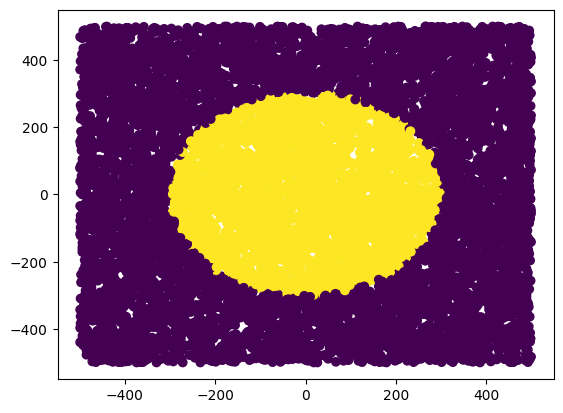

In [2]:


f=open('res_oval.dat')
d=[]
for s in f:
 d.append([float(x) for x in s.split()])
d=np.array(d)
plt.scatter(d[:,0],d[:,1],c=d[:,2])
plt.show()

In [3]:
import tensorflow as tf
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape = (2, )))
model.add(tf.keras.layers.Dense(5, activation = 'relu'))
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 5)              │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21 (84.00 B)

 Trainable params: 21 (84.00 B)

 Non-trainable params: 0 (0.00 B)

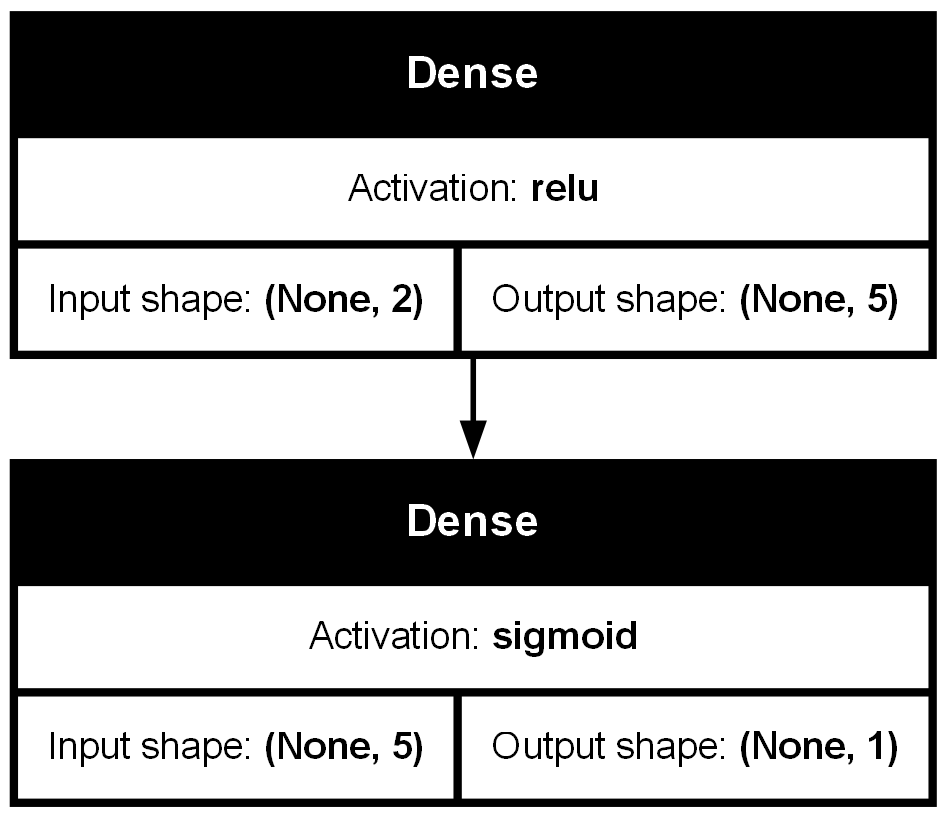

In [4]:
#Теорема апроксимации
tf.keras.utils.plot_model(model, show_layer_activations = True, show_shapes = True)

In [5]:
model.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(d[:, :2], d[:,2], epochs=25)

Epoch 1/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7173 - loss: 1.2095
Epoch 2/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7403 - loss: 0.4137
Epoch 3/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7676 - loss: 0.3913
Epoch 4/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - accuracy: 0.7913 - loss: 0.3720
Epoch 5/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8042 - loss: 0.3540
Epoch 6/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8229 - loss: 0.3379
Epoch 7/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step - accuracy: 0.8358 - loss: 0.3239
Epoch 8/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - accuracy: 0.8471 - loss: 0.3111
Epoch 9/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - accuracy: 0.8581 - loss: 0.3021
Epoch 10/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - accuracy: 0.8647 - loss: 0.2925
Epoch 11/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - accuracy: 0.8714 - loss: 0.2856
Epoch 12/25
313/313 ━━━━━━━━━━━━━━━━━━━━

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 6s 610us/step


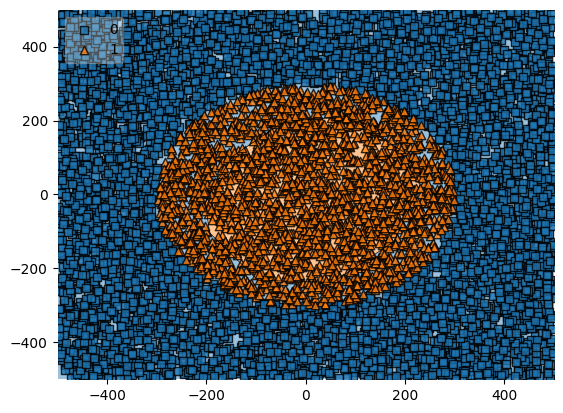

In [6]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(d[:, :2], d[:, 2].astype(int), clf = model, legend = 2)
plt.show()

In [7]:
print(d[d[:, 2] > 0.5].shape[0] / d.shape[0])

0.284


In [8]:
import tensorflow as tf
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape = (2, )))
model.add(tf.keras.layers.Dense(5, activation = 'relu'))
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 5)              │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21 (84.00 B)

 Trainable params: 21 (84.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy', tf.keras.metrics.AUC(curve='PR', name = 'aucpr')])

Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7157 - aucpr: 0.7368 - loss: 1.1015
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7412 - aucpr: 0.9083 - loss: 0.4135
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7649 - aucpr: 0.9195 - loss: 0.3908
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7867 - aucpr: 0.9244 - loss: 0.3707
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8028 - aucpr: 0.9300 - loss: 0.3548
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8231 - aucpr: 0.9397 - loss: 0.3376
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8373 - aucpr: 0.9379 - loss: 0.3257
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8474 - aucpr: 0.9391 - loss: 0.3147
Epoch 9/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8581 - aucpr: 0.9405 - loss: 0.3043
Epoch 10/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8650 - aucpr: 0

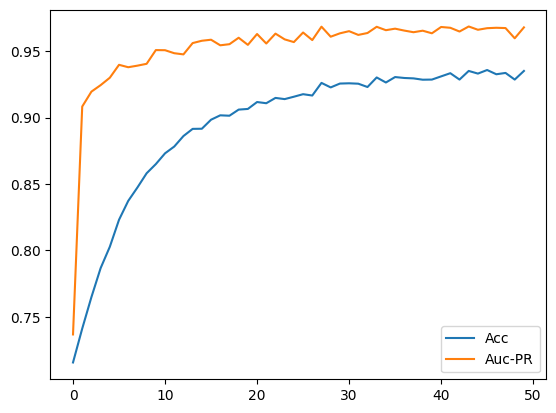

In [10]:
hist = model.fit(d[:, :2], d[:,2], epochs=50)
plt.plot(hist.history['accuracy'], label = 'Acc')
plt.plot(hist.history['aucpr'], label = 'Auc-PR')
plt.legend()
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(d[:, : 2], d[:, 2])
es = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 5, restore_best_weights = True)
hist = model.fit(x_train, y_train, validation_split = 0.2, shuffle = True,epochs = 100, callbacks=[es])
model.evaluate(x_test, y_test)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9368 - aucpr: 0.9698 - loss: 0.1686 - val_accuracy: 0.9587 - val_aucpr: 0.9906 - val_loss: 0.1498
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9345 - aucpr: 0.9686 - loss: 0.1712 - val_accuracy: 0.9300 - val_aucpr: 0.9931 - val_loss: 0.1550
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9347 - aucpr: 0.9693 - loss: 0.1692 - val_accuracy: 0.9180 - val_aucpr: 0.9948 - val_loss: 0.1618
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9352 - aucpr: 0.9644 - loss: 0.1734 - val_accuracy: 0.9320 - val_aucpr: 0.9821 - val_loss: 0.1637
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9415 - aucpr: 0.9732 - loss: 0.1648 - val_accuracy: 0.9000 - val_aucpr: 0.9676 - val_loss: 0.2113
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9312 - aucpr: 0.9620 - loss: 0.1749 - val_accuracy: 0.9047 - val_aucpr: 0.9687 - val_loss: 0.2053
79/79 ━━━━

[0.14610476791858673, 0.9595999717712402, 0.9917620420455933]

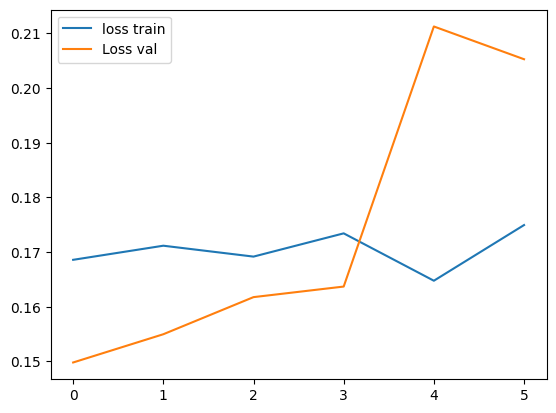

In [12]:
plt.plot(hist.history['loss'], label = 'loss train')
plt.plot(hist.history['val_loss'], label = 'Loss val')
plt.legend()
plt.show()

In [13]:
yprob = model.predict(x_test)
yp = (yprob > 0.5).astype(int)

from sklearn.metrics import classification_report
print(classification_report(y_test, yp))

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      1795
         1.0       0.99      0.87      0.92       705

    accuracy                           0.96      2500
   macro avg       0.97      0.93      0.95      2500
weighted avg       0.96      0.96      0.96      2500



In [14]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, yp))

[[1787    8]
 [  93  612]]


In [15]:
f=open('test_add_short.dat/test_add_short.dat')
d=[]
for s in f:
 d.append([float(x) for x in s.split()])
d=np.array(d)

In [16]:
d.shape

(10000, 5)

In [17]:
x = d[:, : -1]
y = d[:, -1]  

x_train, x_test, y_train, y_test = train_test_split(x, y)

In [18]:

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape = (4, )))
model.add(tf.keras.layers.Dense(9, activation = 'relu'))
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 9)              │            45 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55 (220.00 B)

 Trainable params: 55 (220.00 B)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy', tf.keras.metrics.AUC(curve='PR', name = 'aucpr')])
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=5, restore_best_weights=True)
hist = model.fit(x_train, y_train, validation_split=0.2, shuffle=True, epochs=1000, callbacks=[es])
model.evaluate(x_test, y_test)

Epoch 1/1000
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5627 - aucpr: 0.4930 - loss: 1.1341 - val_accuracy: 0.5693 - val_aucpr: 0.4933 - val_loss: 0.5922
Epoch 2/1000
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6837 - aucpr: 0.5791 - loss: 0.5249 - val_accuracy: 0.7353 - val_aucpr: 0.6127 - val_loss: 0.4831
Epoch 3/1000
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7242 - aucpr: 0.6130 - loss: 0.4949 - val_accuracy: 0.7220 - val_aucpr: 0.6029 - val_loss: 0.4789
Epoch 4/1000
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7507 - aucpr: 0.6324 - loss: 0.4668 - val_accuracy: 0.6927 - val_aucpr: 0.5784 - val_loss: 0.5066
Epoch 5/1000
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7785 - aucpr: 0.6744 - loss: 0.4472 - val_accuracy: 0.7760 - val_aucpr: 0.6570 - val_loss: 0.4427
Epoch 6/1000
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7835 - aucpr: 0.6717 - loss: 0.4371 - val_accuracy: 0.7767 - val_aucpr: 0.6624 - val_loss: 0.4361
Epoc

[0.45099857449531555, 0.7943999767303467, 0.6786441206932068]

In [20]:
yprob = model.predict(x_test)
yp = (yprob > 0.5).astype(int)
print(classification_report(y_test, yp))

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step
              precision    recall  f1-score   support

         0.0       0.97      0.67      0.79      1464
         1.0       0.68      0.97      0.80      1036

    accuracy                           0.79      2500
   macro avg       0.82      0.82      0.79      2500
weighted avg       0.85      0.79      0.79      2500

